# Predicting Heart Disease
 ### 9/12/18

Attribute Information:
------------------------
-- 1. age

-- 2. sex

-- 3. chest pain type (4 values)

-- 4. resting blood pressure

-- 5. serum cholestoral in mg/dl

-- 6. fasting blood sugar > 120 mg/dl

-- 7. resting electrocardiographic results (values 0,1,2)

-- 8. maximum heart rate achieved

-- 9. exercise induced angina

-- 10. oldpeak = ST depression induced by exercise relative to rest

-- 11. the slope of the peak exercise ST segment

-- 12. number of major vessels (0-3) colored by flourosopy

-- 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


Attributes types
-----------------

Real: 1,4,5,8,10,12

Ordered:11,

Binary: 2,6,9

Nominal:7,3,13

Variable to be predicted
------------------------
Absence (1) or presence (2) of heart disease


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# Data taken from : https://www.drivendata.org/competitions/54/machine-learning-with-a-heart/page/107/
# 124 female sex, 56 male sex



df = pd.read_csv('train_values.csv')
dfpresent = pd.read_csv('train_labels.csv')

In [3]:
df = df.set_index('patient_id').join(dfpresent.set_index('patient_id'))

df.head(10)

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
patient_id,,,,,,,,,,,,,,
0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
ldukkw,1,normal,130,3,0,0,0,180,0.0,1,42,150,0,0
2gbyh9,2,reversible_defect,150,4,2,0,2,258,2.6,0,60,157,0,1
daa9kp,2,fixed_defect,150,4,1,0,2,276,0.6,1,57,112,1,1
3nwy2n,3,reversible_defect,170,4,0,0,2,326,3.4,1,59,140,1,1


                                      slope_of_peak_exercise_st_segment  \
slope_of_peak_exercise_st_segment                              1.000000   
resting_blood_pressure                                         0.098287   
chest_pain_type                                                0.121207   
num_major_vessels                                              0.076832   
fasting_blood_sugar_gt_120_mg_per_dl                           0.050199   
resting_ekg_results                                            0.172191   
serum_cholesterol_mg_per_dl                                   -0.032348   
oldpeak_eq_st_depression                                       0.615948   
sex                                                            0.093340   
age                                                            0.169918   
max_heart_rate_achieved                                       -0.418102   
exercise_induced_angina                                        0.225459   
heart_disease_present    

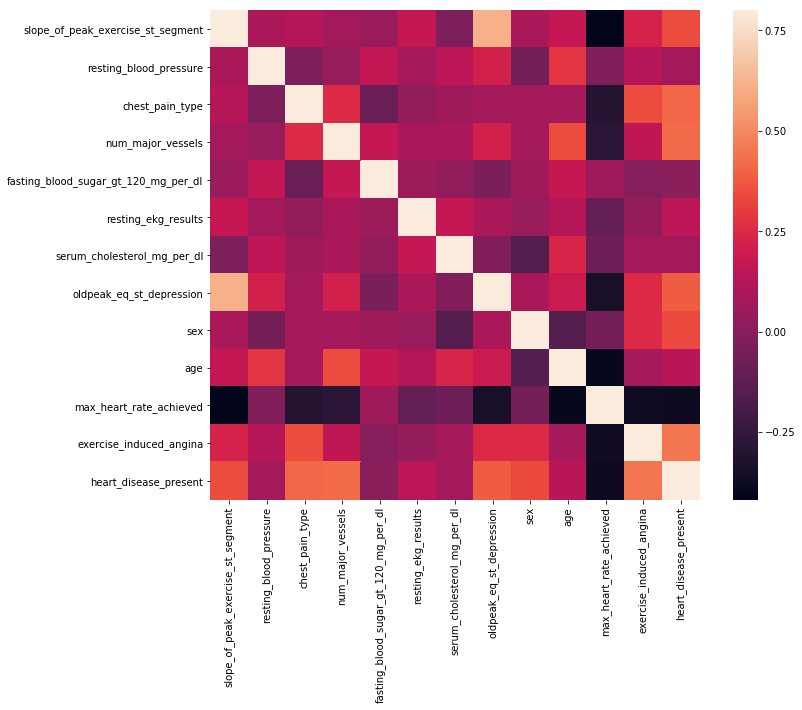

In [4]:
# Make the correlation matrix.
corrmat = df.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [5]:
df.dtypes

slope_of_peak_exercise_st_segment         int64
thal                                     object
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
heart_disease_present                     int64
dtype: object

In [6]:
dummy = pd.get_dummies(df['thal'])
dfnew = df.drop('thal',1)
result = pd.concat([dfnew, dummy], axis=1, sort=False)

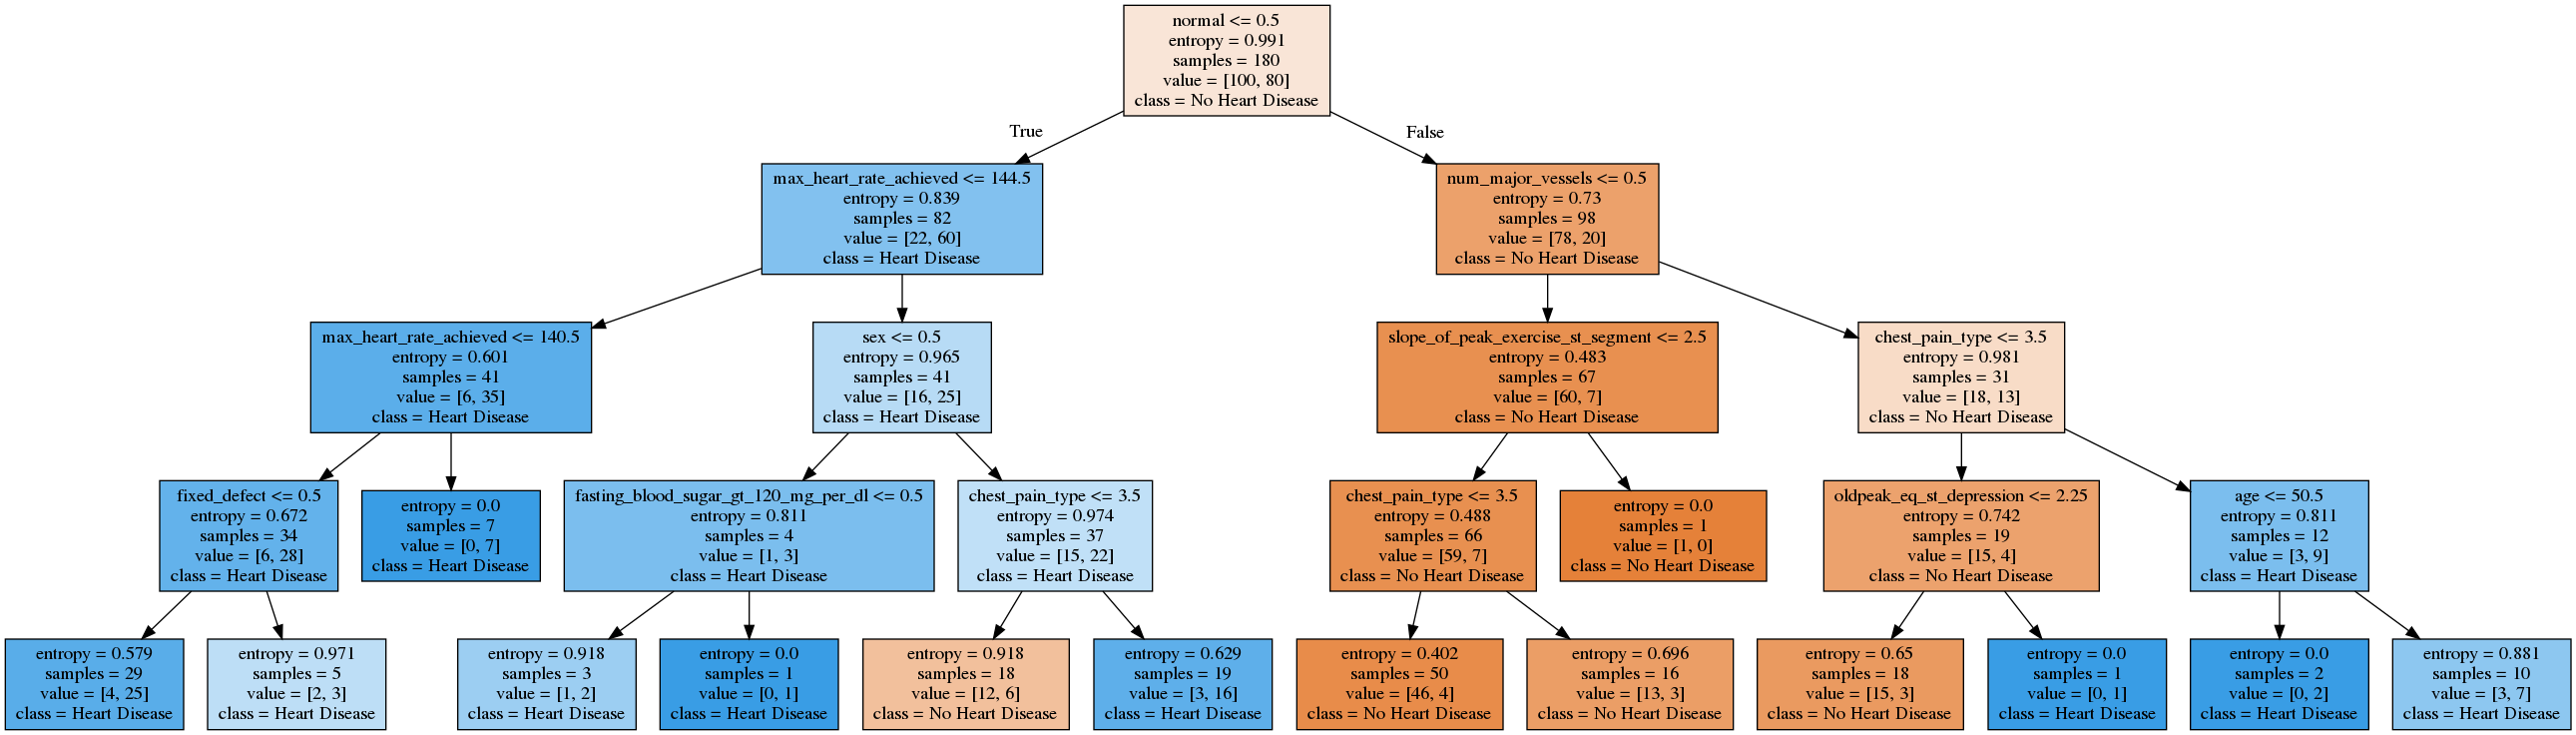

In [7]:
feat =  result.drop('heart_disease_present',1)
present = result['heart_disease_present']




from sklearn import tree


from IPython.display import Image
from sklearn.model_selection import cross_val_score



import pydotplus
import graphviz

decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
)
decision_tree.fit(feat, present)


dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=feat.columns,
    class_names=['No Heart Disease', 'Heart Disease'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


In [8]:
result = result.dropna()

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn import ensemble
from sklearn.model_selection import cross_val_score


X = result.drop('heart_disease_present',1)
Y = result['heart_disease_present']


clf = RandomForestClassifier(n_estimators=50, random_state=0, n_jobs=-1, max_features=.2, criterion='gini')

clf.fit(X,Y)

print(cross_val_score(clf, X, Y, cv=7))
print('\n\n\n')

listoff=[]
for feature in zip(list(result), clf.feature_importances_):
    listoff.append(feature)
    print(feature)


    

/home/ebicher/.local/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[0.66666667 0.77777778 0.92307692 0.92       0.76       0.64
 0.84      ]




('slope_of_peak_exercise_st_segment', 0.04478481321217548)
('resting_blood_pressure', 0.06537962511319019)
('chest_pain_type', 0.10799340183382414)
('num_major_vessels', 0.08193560752481449)
('fasting_blood_sugar_gt_120_mg_per_dl', 0.007455095054896474)
('resting_ekg_results', 0.022920754389146612)
('serum_cholesterol_mg_per_dl', 0.07819903135435305)
('oldpeak_eq_st_depression', 0.10935427470989433)
('sex', 0.052524062555663574)
('age', 0.09409072008568384)
('max_heart_rate_achieved', 0.1018514195216863)
('exercise_induced_angina', 0.05475604159915871)
('heart_disease_present', 0.005043260941638292)
('fixed_defect', 0.06010606427800335)
('normal', 0.11360582782587123)


# The random forest classifer is much stronger than just a decision tree

In [14]:
print('Descision Tree Score:')
print(cross_val_score(decision_tree, feat, present, cv=10))
print('\n Mean: ')
print(np.mean(cross_val_score(decision_tree, feat, present, cv=10)))
print('\n\n\n')

print('Random Forest Score:')
print(cross_val_score(clf, X, Y, cv=10))
print('\n Mean: ')
print(np.mean(cross_val_score(clf, X, Y, cv=10)))
print('\n\n\n')

Descision Tree Score:
[0.72222222 0.61111111 0.66666667 0.77777778 0.83333333 0.72222222
 0.72222222 0.72222222 0.72222222 0.72222222]

 Mean: 
0.6833333333333333




Random Forest Score:
[0.77777778 0.72222222 0.83333333 1.         0.88888889 0.88888889
 0.88888889 0.72222222 0.72222222 0.88888889]

 Mean: 
0.8333333333333334




